## Title :

Exercise: Regression with Boosting
    
## Description :

The goal of this exercise is to understand Gradient Boosting Regression.

<img src="../fig/fig1.png" style="width: 500px;">

## Instructions:

- Part A: 
    - Read the dataset airquality.csv as a pandas dataframe.
    - Take a quick look at the dataset.
    - Assign the predictor and response variables appropriately as mentioned in the scaffold.
    - Fit a single decision tree stump and predict on the entire data.
    - Calculate the residuals and fit another tree on the residuals.
    - Take a combination of the trees and fit on the model.
    - For each of these model use the helper code provided to plot the model prediction and data.

- Part B: Compare to bagging 
    - Split the data into train and test splits.
    - Specify the number of bootstraps for bagging to be 30 and a maximum depth of 3.
    - Define a Gradient Boosting Regression model that uses with 1000 estimators and depth of 1.
    - Define a Bagging Regression model that uses the Decision Tree as its base estimator.
    - Fit both the models on the train data.
    - Use the helper code to predict using the mean model and individual estimators. The plot will look similar to the one given above.
    - Compute the MSE of the 2 models on the test data.

## Hints: 

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html" target="_blank">sklearn.DecisionTreeRegressor()</a>
A decision tree regressor.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.fit" target="_blank">regressor.fit()</a>
Build a decision tree regressor from the training set (X, y).

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" target="_blank">sklearn.DecisionTreeClassifier()</a>
Generates a Logistic Regression classifier.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit" target="_blank">classifier.fit()</a>
Build a decision tree classifier from the training set (X, y).

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">sklearn.train_test_split()</a>
Split arrays or matrices into om train and test subsets.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html" target="_blank">BaggingRegressor()</a>
Returns a Bagging regressor instance.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html" target="_blank">sklearn.mean_squared_error()</a>
Mean squared error regression loss.

<a href="https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html" target="_blank">GradientBoostingRegressor()</a>
Gradient Boosting for regression.

**Note:** This exercise is **auto-graded and you can try multiple attempts.**

In [1]:
# Import necessary libraries
import itertools
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
%matplotlib inline


In [2]:
# Read the dataset airquality.csv
df = pd.read_csv("../data/airquality.csv")


In [25]:
# Take a quick look at the data
# Remove rows with missing values
df = df[df.Ozone.notna()]
df.head()


,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,53.3,5,1
1,36.0,118.0,8.0,89.1,5,2
2,12.0,149.0,12.6,42.7,5,3
3,18.0,313.0,11.5,53.9,5,4
4,28.0,NaN,14.9,69.5,5,6


In [26]:
# Assign "x" column as the predictor variable and "y" as the
# We only use Ozone as a predictor for this exercise and Temp as the response
x, y = df['Ozone'].values, df['Temp'].values

# Sorting the data based on X values
x, y = list(zip(*sorted(zip(x,y))))
# The sorted() method sorts tuples by default, using the first item in each tuple.
# sorted() returns a list of tuples
# *sorted() returns lots of tuples (w/o list)
x, y = np.array(x).reshape(-1,1),np.array(y)


In [27]:
y = y - np.mean(y)

array([-17.85258621, -29.35258621, -10.15258621,  -3.15258621,
         5.04741379,  28.74741379, -12.95258621, -11.35258621,
        -4.25258621,   9.94741379, -15.65258621, -24.25258621,
       -19.65258621, -10.25258621, -39.75258621, -18.85258621,
        -8.25258621,   1.84741379,   8.94741379,  22.84741379,
       -12.95258621, -10.35258621,  -6.75258621,   3.94741379,
       -31.35258621, -11.05258621,  -8.95258621,   3.04741379,
       -35.15258621, -28.55258621, -12.65258621,  -1.75258621,
       -45.85258621, -19.55258621, -12.65258621,  -2.25258621,
        -0.55258621,  -8.35258621,   0.34741379,   0.54741379,
        12.14741379,  26.24741379, -20.65258621, -16.75258621,
        -5.45258621,   8.44741379,  12.74741379,  17.64741379,
        -1.45258621,   7.14741379,  28.44741379, -15.35258621,
       -12.95258621,  20.14741379, -15.25258621, -10.45258621,
        -7.15258621,  11.74741379,   1.84741379,   4.44741379,
        25.84741379,  -0.25258621, -23.75258621,  14.84

## Part A: Gradient Boosting by hand

In [28]:
# Initialise a single decision tree stump
basemodel = DecisionTreeRegressor(max_depth=1)

# Fit the stump on the entire data
basemodel.fit(x, y)

# Predict on the entire data
y_pred = basemodel.predict(x)


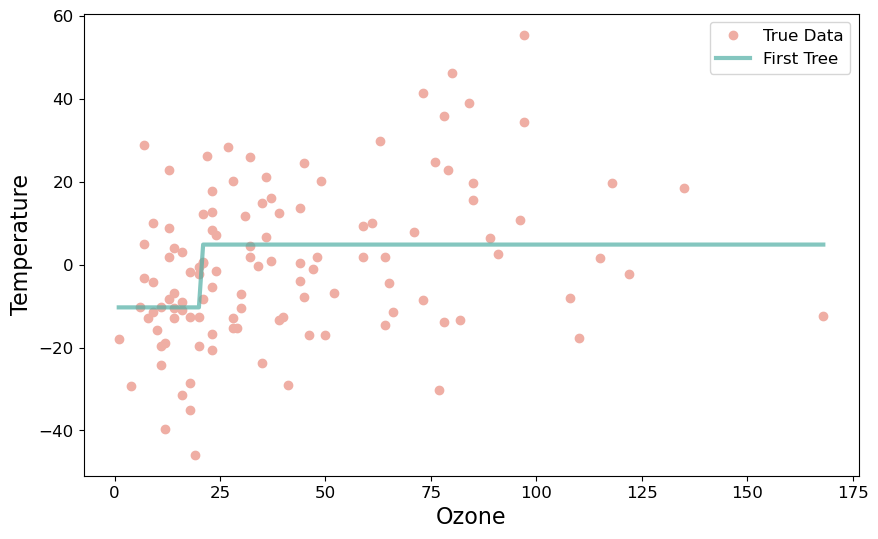

In [29]:
# Helper code to plot the data
plt.figure(figsize=(10,6))
xrange = np.linspace(x.min(),x.max(),100)
plt.plot(x,y,'o',color='#EFAEA4', markersize=6, label="True Data")
plt.xlim()
plt.plot(x,y_pred,alpha=0.7,linewidth=3,color='#50AEA4', label='First Tree')
plt.xlabel("Ozone", fontsize=16)
plt.ylabel("Temperature", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best',fontsize=12)
plt.show()


In [30]:
### edTest(test_first_residuals) ###

# Calculate the error residuals
residuals = y-y_pred
residuals


array([-7.53513514e+00, -1.90351351e+01,  1.64864865e-01,  7.16486486e+00,
        1.53648649e+01,  3.90648649e+01, -2.63513514e+00, -1.03513514e+00,
        6.06486486e+00,  2.02648649e+01, -5.33513514e+00, -1.39351351e+01,
       -9.33513514e+00,  6.48648649e-02, -2.94351351e+01, -8.53513514e+00,
        2.06486486e+00,  1.21648649e+01,  1.92648649e+01,  3.31648649e+01,
       -2.63513514e+00, -3.51351351e-02,  3.56486486e+00,  1.42648649e+01,
       -2.10351351e+01, -7.35135135e-01,  1.36486486e+00,  1.33648649e+01,
       -2.48351351e+01, -1.82351351e+01, -2.33513514e+00,  8.56486486e+00,
       -3.55351351e+01, -9.23513514e+00, -2.33513514e+00,  8.06486486e+00,
        9.76486486e+00, -1.31848101e+01, -4.48481013e+00, -4.28481013e+00,
        7.31518987e+00,  2.14151899e+01, -2.54848101e+01, -2.15848101e+01,
       -1.02848101e+01,  3.61518987e+00,  7.91518987e+00,  1.28151899e+01,
       -6.28481013e+00,  2.31518987e+00,  2.36151899e+01, -2.01848101e+01,
       -1.77848101e+01,  

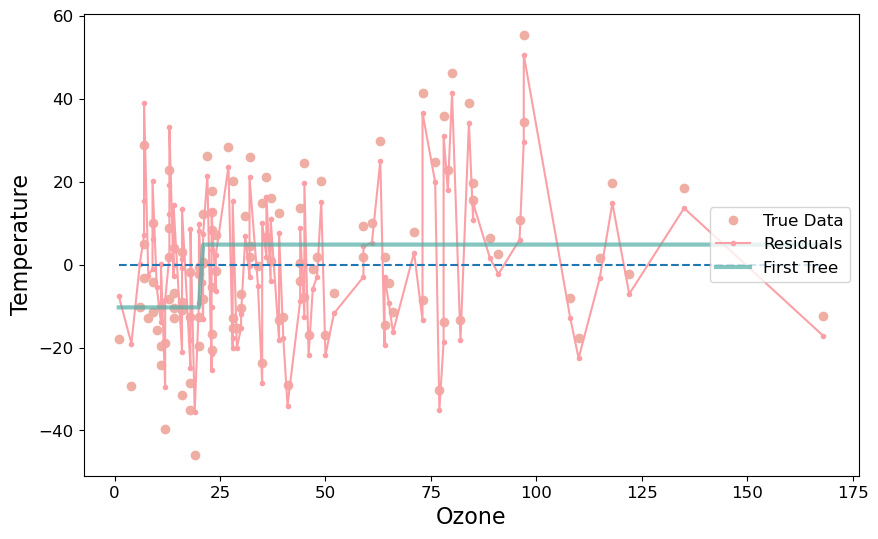

In [31]:
# Helper code to plot the data with the residuals
plt.figure(figsize=(10,6))
plt.plot(x,y,'o',color='#EFAEA4', markersize=6, label="True Data")
plt.plot(x,residuals,'.-',color='#faa0a6', markersize=6, label="Residuals")
plt.plot([x.min(),x.max()],[0,0],'--')
plt.xlim()
plt.plot(x,y_pred,alpha=0.7,linewidth=3,color='#50AEA4', label='First Tree')
plt.xlabel("Ozone", fontsize=16)
plt.ylabel("Temperature", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='center right',fontsize=12)
plt.show()


In [32]:
### edTest(test_fitted_residuals) ###

# Initialise a tree stump
dtr = DecisionTreeRegressor(max_depth=1)

# Fit the tree stump on the residuals
dtr.fit(x, residuals)

# Predict on the entire data
y_pred_residuals = dtr.predict(x)


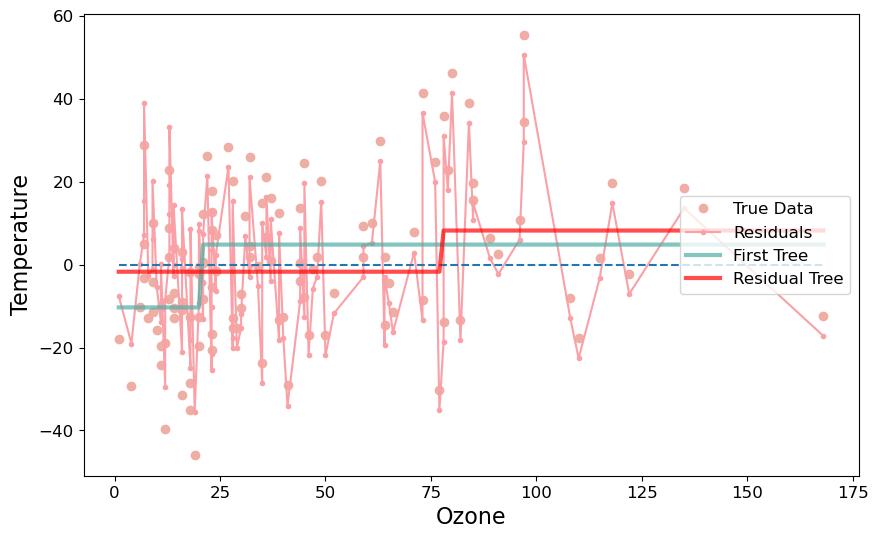

In [33]:
# Helper code to add the fit of the residuals to the original plot 
plt.figure(figsize=(10,6))

plt.plot(x,y,'o',color='#EFAEA4', markersize=6, label="True Data")
plt.plot(x,residuals,'.-',color='#faa0a6', markersize=6, label="Residuals")
plt.plot([x.min(),x.max()],[0,0],'--')
plt.xlim()
plt.plot(x,y_pred,alpha=0.7,linewidth=3,color='#50AEA4', label='First Tree')
plt.plot(x,y_pred_residuals,alpha=0.7,linewidth=3,color='red', label='Residual Tree')
plt.xlabel("Ozone", fontsize=16)
plt.ylabel("Temperature", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='center right',fontsize=12)
plt.show()

In [34]:
### edTest(test_new_pred) ###

# Set a lambda value and compute the predictions based on 
# the residuals
lambda_ = 0.01
y_pred_new = y_pred + y_pred_residuals


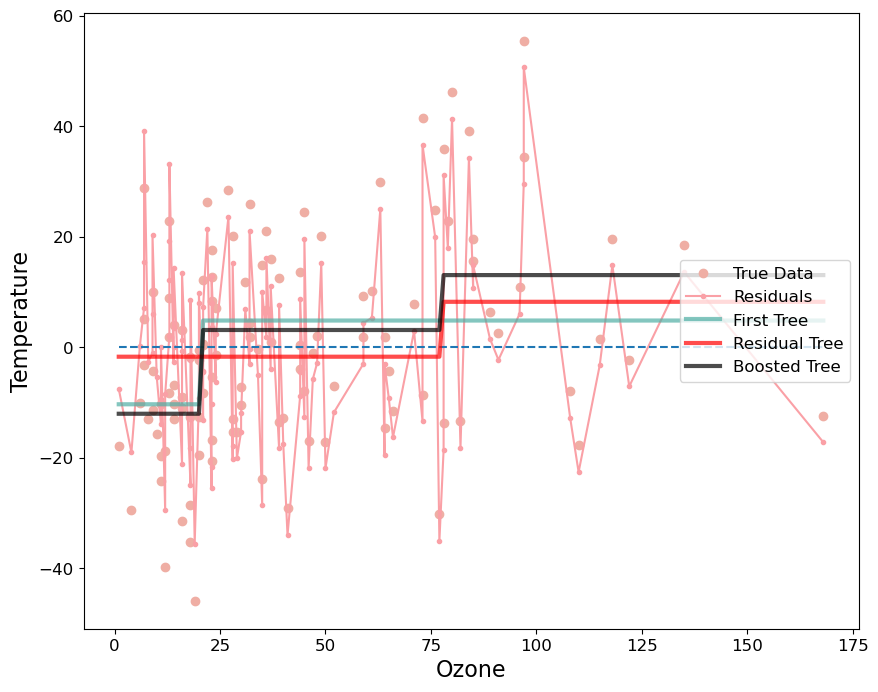

In [35]:
# Helper code to plot the boosted tree
plt.figure(figsize=(10,8))
plt.plot(x,y,'o',color='#EFAEA4', markersize=6, label="True Data")
plt.plot(x,residuals,'.-',color='#faa0a6', markersize=6, label="Residuals")
plt.plot([x.min(),x.max()],[0,0],'--')
plt.xlim()
plt.plot(x,y_pred,alpha=0.7,linewidth=3,color='#50AEA4', label='First Tree')
plt.plot(x,y_pred_residuals,alpha=0.7,linewidth=3,color='red', label='Residual Tree')
plt.plot(x,y_pred_new,alpha=0.7,linewidth=3,color='k', label='Boosted Tree')
plt.xlabel("Ozone", fontsize=16)
plt.ylabel("Temperature", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='center right',fontsize=12)
plt.show()


# Part 2: Comparison with Bagging

To compare the two methods, we will be using sklearn's methods and not our own implementation from above. 

In [36]:
# Split the data into train and test sets with train size as 0.8 
# and random_state as 102
# The default value for shuffle is True for train_test_split, so the ordering we 
# did above is not a problem. 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=102)


In [40]:
### edTest(test_boosting) ###

# Set a learning rate
l_rate = 0.1

# Initialise a Boosting model using sklearn's boosting model 
# Use 1000 estimators, depth of 1 and learning rate as defined above
boosted_model  = GradientBoostingRegressor(learning_rate=l_rate, max_depth=1, n_estimators=1000)

# Fit on the train data
boosted_model.fit(x_train, y_train)

# Predict on the test data
y_pred = boosted_model.predict(x_test)


In [38]:
# Specify the number of bootstraps
num_bootstraps = 30

# Specify the maximum depth of the decision tree
max_depth = 100

# Define the Bagging Regressor Model
# Use Decision Tree as your base estimator with depth as mentioned in max_depth
# Initialise number of estimators using the num_bootstraps value
# Set max_samples as 1 and random_state as 3
model = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=max_depth), n_estimators=num_bootstraps, random_state=3, max_samples=1)
                        

# Fit the model on the train data
model.fit(x_train, y_train)


BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=100), max_samples=1,
                 n_estimators=30, random_state=3)

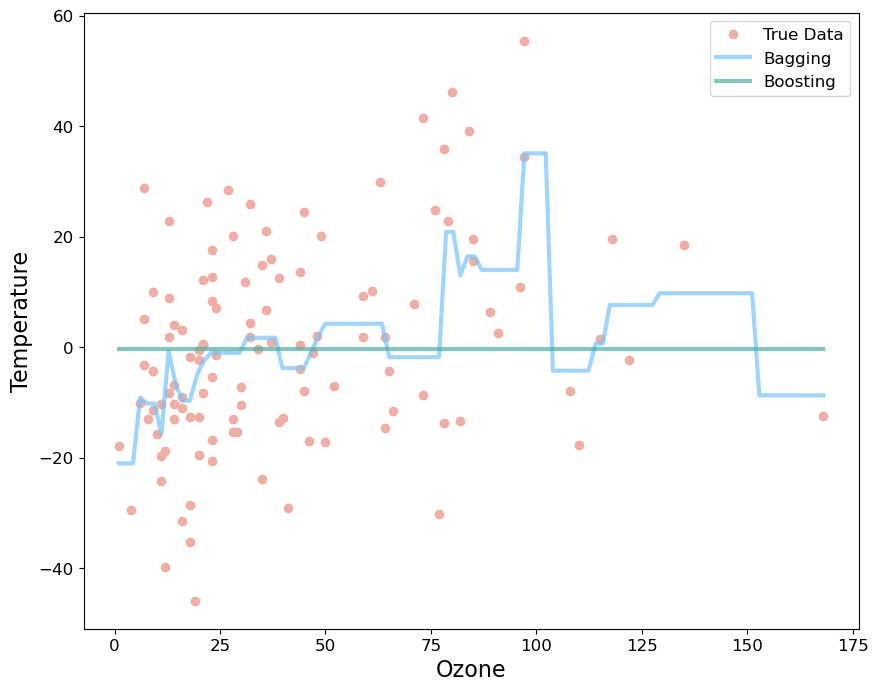

In [41]:
# Helper code to plot the bagging and boosting model predictions
plt.figure(figsize=(10,8))
xrange = np.linspace(x.min(),x.max(),100).reshape(-1,1)
y_pred_boost = boosted_model.predict(xrange)
y_pred_bag = model.predict(xrange)
plt.plot(x,y,'o',color='#EFAEA4', markersize=6, label="True Data")
plt.xlim()
plt.plot(xrange,y_pred_boost,alpha=0.7,linewidth=3,color='#77c2fc', label='Bagging')
plt.plot(xrange,y_pred_bag,alpha=0.7,linewidth=3,color='#50AEA4', label='Boosting')
plt.xlabel("Ozone", fontsize=16)
plt.ylabel("Temperature", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best',fontsize=12)
plt.show()


In [43]:
### edTest(test_mse) ###

# Compute the MSE of the Boosting model prediction on the test data
boost_mse = mean_squared_error(y_test, y_pred)
print("The MSE of the Boosting model is", boost_mse)


The MSE of the Boosting model is 351.51888425229686


In [44]:
# Compute the MSE of the Bagging model prediction on the test data
bag_mse = mean_squared_error(y_test, model.predict(x_test))
print("The MSE of the Bagging model is", bag_mse)


The MSE of the Bagging model is 412.5201
